In [19]:
'''# Importing required libraries'''
import os
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score,confusion_matrix,classification_report
import seaborn as sns
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from numpy import sqrt
from numpy import argmax
from matplotlib import pyplot
from keras.models import load_model
import numpy as np
import cv2
import time
import glob

In [37]:
'''# labling the dataset'''

path = r'Assignment images'
image_list = {}
folders = os.listdir(path)
for folder in folders:
    images = os.listdir(path + '/'+ folder)
    image_list[folder] = pd.DataFrame(images)
labelled_image_df = pd.concat(image_list)
labelled_image_df = labelled_image_df.reset_index().drop(['level_1'], axis = 1)
labelled_image_df.columns = ['class_id','Images']
'''encode the class lable''' 
encoder = OrdinalEncoder()
labelled_image_df["class_id_code"] = encoder.fit_transform(labelled_image_df[["class_id"]]).astype(int)
labelled_image_df.to_csv("labelled_image_data.csv",index = False)


In [21]:
'''Image and enhancement'''
def CLAHE_image_balance(img):
    result = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
    avg_a = np.average(result[:, :, 1])
    avg_b = np.average(result[:, :, 2])
    result[:, :, 1] = result[:, :, 1] - ((avg_a - 128) * (result[:, :, 0] / 255.0) * 1.1)
    result[:, :, 2] = result[:, :, 2] - ((avg_b - 128) * (result[:, :, 0] / 255.0) * 1.1)
    result = cv2.cvtColor(result, cv2.COLOR_LAB2BGR)
    return result

for folder in folders:
    images_path = glob.glob(r"Assignment images/" + folder+ "//*.jpg")
    for images in images_path:
        img = cv2.imread(images)
        final = np.hstack((img, CLAHE_image_balance(img)))
        result = CLAHE_image_balance(img)
        new_path = r'DataSet/' + os.path.basename(images)
        cv2.imwrite(new_path,result)

Found 2115 validated image filenames belonging to 3 classes.
Found 529 validated image filenames belonging to 3 classes.
Epoch 1/200
70/70 [==============================] - 5s 44ms/step - loss: 1.1341 - accuracy: 0.4196 - val_loss: 1.0153 - val_accuracy: 0.5743 - lr: 1.0000e-04
Epoch 2/200
70/70 [==============================] - 3s 37ms/step - loss: 0.8428 - accuracy: 0.6369 - val_loss: 0.8127 - val_accuracy: 0.6716 - lr: 1.0000e-04
Epoch 3/200
70/70 [==============================] - 3s 39ms/step - loss: 0.6718 - accuracy: 0.7554 - val_loss: 0.6799 - val_accuracy: 0.7514 - lr: 1.0000e-04
Epoch 4/200
70/70 [==============================] - 3s 39ms/step - loss: 0.5754 - accuracy: 0.8067 - val_loss: 0.5893 - val_accuracy: 0.8028 - lr: 1.0000e-04
Epoch 5/200
70/70 [==============================] - 3s 38ms/step - loss: 0.4590 - accuracy: 0.8528 - val_loss: 0.5355 - val_accuracy: 0.8229 - lr: 1.0000e-04
Epoch 6/200
70/70 [==============================] - 3s 39ms/step - loss: 0.4260 - a

Epoch 51/200
70/70 [==============================] - 3s 43ms/step - loss: 0.1619 - accuracy: 0.9438 - val_loss: 0.2162 - val_accuracy: 0.9294 - lr: 1.0000e-04
Epoch 52/200
70/70 [==============================] - 3s 41ms/step - loss: 0.1528 - accuracy: 0.9491 - val_loss: 0.2182 - val_accuracy: 0.9275 - lr: 1.0000e-04
Epoch 53/200
70/70 [==============================] - 3s 42ms/step - loss: 0.1599 - accuracy: 0.9420 - val_loss: 0.2144 - val_accuracy: 0.9257 - lr: 1.0000e-04
Epoch 54/200
70/70 [==============================] - 3s 42ms/step - loss: 0.1517 - accuracy: 0.9422 - val_loss: 0.2134 - val_accuracy: 0.9257 - lr: 1.0000e-04
Epoch 55/200
70/70 [==============================] - 3s 42ms/step - loss: 0.1584 - accuracy: 0.9395 - val_loss: 0.2011 - val_accuracy: 0.9303 - lr: 1.0000e-04
Epoch 56/200
70/70 [==============================] - 3s 39ms/step - loss: 0.1370 - accuracy: 0.9548 - val_loss: 0.2061 - val_accuracy: 0.9275 - lr: 1.0000e-04
Epoch 57/200
70/70 [====================

70/70 [==============================] - 3s 44ms/step - loss: 0.1138 - accuracy: 0.9696 - val_loss: 0.1633 - val_accuracy: 0.9431 - lr: 1.0000e-04
Epoch 103/200
70/70 [==============================] - 3s 45ms/step - loss: 0.1192 - accuracy: 0.9603 - val_loss: 0.1680 - val_accuracy: 0.9440 - lr: 1.0000e-04
Epoch 104/200
70/70 [==============================] - 3s 45ms/step - loss: 0.1095 - accuracy: 0.9616 - val_loss: 0.1744 - val_accuracy: 0.9358 - lr: 1.0000e-04
Epoch 105/200
70/70 [==============================] - 3s 45ms/step - loss: 0.1148 - accuracy: 0.9589 - val_loss: 0.1684 - val_accuracy: 0.9385 - lr: 1.0000e-04
Epoch 106/200
70/70 [==============================] - 3s 45ms/step - loss: 0.1167 - accuracy: 0.9554 - val_loss: 0.1644 - val_accuracy: 0.9422 - lr: 1.0000e-04
Epoch 107/200
70/70 [==============================] - 3s 45ms/step - loss: 0.1033 - accuracy: 0.9616 - val_loss: 0.1678 - val_accuracy: 0.9431 - lr: 1.0000e-04
Epoch 108/200
70/70 [===========================

Epoch 153/200
70/70 [==============================] - 3s 44ms/step - loss: 0.0973 - accuracy: 0.9688 - val_loss: 0.1470 - val_accuracy: 0.9495 - lr: 1.0000e-04
Epoch 154/200
70/70 [==============================] - 3s 45ms/step - loss: 0.1054 - accuracy: 0.9684 - val_loss: 0.1555 - val_accuracy: 0.9450 - lr: 1.0000e-04
Epoch 155/200
70/70 [==============================] - 3s 45ms/step - loss: 0.1059 - accuracy: 0.9625 - val_loss: 0.1515 - val_accuracy: 0.9477 - lr: 1.0000e-04
Epoch 156/200
70/70 [==============================] - 3s 45ms/step - loss: 0.1028 - accuracy: 0.9675 - val_loss: 0.1453 - val_accuracy: 0.9486 - lr: 1.0000e-04
Epoch 157/200
70/70 [==============================] - 3s 47ms/step - loss: 0.0963 - accuracy: 0.9634 - val_loss: 0.1531 - val_accuracy: 0.9486 - lr: 1.0000e-04
Epoch 158/200
70/70 [==============================] - 3s 46ms/step - loss: 0.0993 - accuracy: 0.9657 - val_loss: 0.1541 - val_accuracy: 0.9459 - lr: 1.0000e-04
Epoch 159/200
70/70 [=============

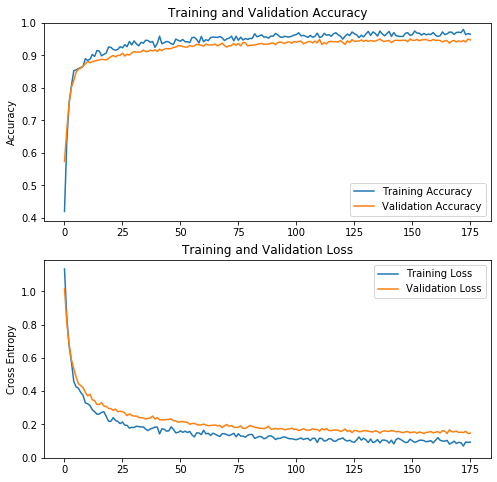

In [23]:
"""# Prepare training data`"""

#Read the train.csv file from the right location
training_data = pd.read_csv("labelled_image_data.csv")
#Appending the file extension to the image names
training_imgs = [x for x in list(training_data.Images)]

#Creating a new dataframe with updated images names
training_labels = list(training_data['class_id_code'])
training_data = pd.DataFrame( {'Images': training_imgs,'class_id_code': training_labels})

#Changing the type of categorical variable(from int to str)
training_data.class_id_code = training_data.class_id_code.astype(str)

"""# Split into test and train"""

from sklearn.model_selection import train_test_split
training_set, validation_set = train_test_split(training_data, random_state = 0, test_size = 0.2)

"""# Preprocessing the Image data"""

from tensorflow.keras.preprocessing.image import ImageDataGenerator




'''# image augmentation techniques'''
train_dataGen = ImageDataGenerator(shear_range = 0.2, 
                                    zoom_range = 0.2,
                                    horizontal_flip = True,
                                    vertical_flip=True,
                                    preprocessing_function= None,
                                   rescale = 1./255,  
                                   rotation_range = 90,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                     )
'''normalising dataset'''
validation_datagen = ImageDataGenerator(rescale=1./255)

train_dir = "DataSet"
train_generator = train_dataGen.flow_from_dataframe(dataframe = training_set, seed = 111,
                                                    directory=train_dir,x_col="Images", y_col="class_id_code", 
                                                    class_mode="categorical", target_size=(224,224), batch_size=16)
val_dir = "DataSet"
validation_generator = validation_datagen.flow_from_dataframe(dataframe= validation_set, seed = 111,
                                                              directory=val_dir, x_col="Images", y_col="class_id_code", 
                                                              class_mode="categorical", target_size=(224,224), batch_size=16)

"""# Initializing the base model"""

image_size = 224
IMG_SHAPE = (image_size, image_size, 3)

#Create the base model from the pre-trained model MobileNet V2 
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                              include_top=False,
                                                 classes=3,
                                              weights='imagenet')

for layer in base_model.layers:
  layer.trainable = False

"""# Adding Extra layers to Pre-trained Model"""

model = tf.keras.Sequential([
                          base_model,
                          keras.layers.GlobalAveragePooling2D(),
                          keras.layers.Dense(3, activation='softmax')]) #sigmoid for binary model

"""# Compiling the model"""

model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

''' defining callback '''
now = time.strftime("%Y%m%d%H%M%S", time.localtime())
#defining logger
callback_logger = tf.keras.callbacks.CSVLogger("log_training_{}.csv".format(now)
                        , separator=','
                        , append=False
                        )
# saved the improved version of model
callack_saver = tf.keras.callbacks.ModelCheckpoint(
                            "E[{epoch:02d}]"
                            + "_LOS[{val_loss:.3f}]"
                            + "_ACC[{val_accuracy:.3f}]"
                            + ".h5" 
                        , monitor='val_loss'
                        , verbose=0
                        , mode='auto'
                        , period=20
                        , save_best_only=True
                    )
# Reduce learning rate when a metric has stopped improving
callback_reducer = tf.keras.callbacks.ReduceLROnPlateau(
                                monitor='val_loss'
                                , factor=0.5
                                , patience=20                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          
                                , min_lr=1e-6
                                , min_delta=1e-3
                            )
# Stop training when a monitored metric has stopped improving
callback_stopper = tf.keras.callbacks.EarlyStopping(
                            monitor='val_loss'
                            , min_delta=1e-3
                            , patience=20
                            , verbose=0
                            , mode='auto'
                        )
list_callback = [
        callback_logger
        ,callack_saver
        ,callback_reducer
        ,callback_stopper
    ]

model_json=model.to_json()
with open("model.json","w") as json_file:
    json_file.write(model_json)




"""# Training the model"""

epochs = 200
steps_per_epoch = 70
validation_steps = 70

history = model.fit(train_generator,
                              steps_per_epoch = steps_per_epoch,
                              epochs=epochs,
                              workers=4,
                              verbose = 1,
                              validation_data=validation_generator,
                              validation_steps=validation_steps,
                                callbacks=list_callback)

"""# Visualizing the training and Validation performance"""

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,max(plt.ylim())])
plt.title('Training and Validation Loss')
plt.show()
# '''# Saving the model'''
# model.save(f"tf_mobv3_200.h5")


/tmp/ipykernel_1438677/2598639395.py:14: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  preds = np.asscalar(preds[0])


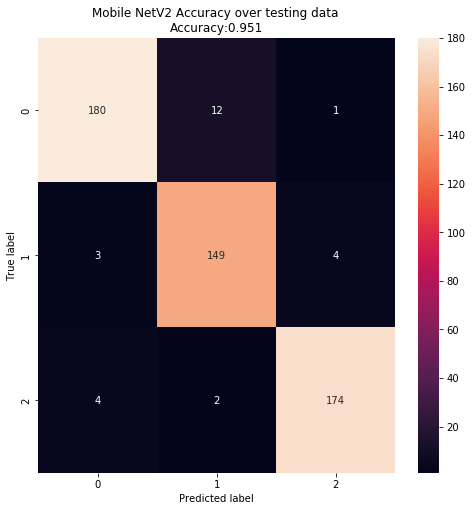

In [85]:
'''# Tesing trainned model'''
#loading the model
model = load_model("E[160]_LOS[0.150]_ACC[0.950].h5")
y_pred = []
for i in validation_set['Images']:
    image_name= 'DataSet/'+i
    img = tf.keras.utils.load_img(image_name,False,target_size=(224,224))
    x = tf.keras.utils.img_to_array(img)
    x = x/255
    x = np.expand_dims(x, axis=0)
    # preds = model.predict_classes(x)
    prob = model.predict(x, verbose=0)
    preds=np.argmax(prob,axis=1)
    preds = np.asscalar(preds[0])
    y_pred.append(preds)

result_test['predicted_class'] = y_pred
# result_test['prob'] = predict_prob
result_test['class_id_code'] = result_test['class_id_code'].astype(int)

y_test = result_test['class_id_code']
y_pred = result_test['predicted_class']
# y_prob = result_test['prob']

'''# Ploting confusion metrix'''
# Creates a confusion matrix
cm = confusion_matrix(y_test, y_pred) 

# Transform to df for easier plotting
cm_df = pd.DataFrame(cm)
plt.figure(figsize=(8,8))
sns.heatmap(cm_df, annot=True,fmt='g')
plt.title('Mobile NetV2 Accuracy over testing data \nAccuracy:{0:.3f}'.format(accuracy_score(result_test['class_id_code'], result_test['predicted_class'])))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()